In [1]:
cd ../system/

/Users/dorislee/Desktop/Research/viz-sum/system


In [5]:
from lattice import Lattice
from node import vizNode
import networkx as nx
from vizObj import vizObj
from collections import OrderedDict
import json

In [6]:
# set up the tree example
G = Lattice()
v1 = vizObj(x=["Clinton", "Trump", "Others"],y="% of vote",filters=["All"],\
            agg_func="SUM",tablename="election")
v1.setData([48, 46, 6])
root = vizNode(viz=v1, parents=None)

v2 = vizObj(x=["Clinton", "Trump", "Others"],y="% of vote",filters=["Race = White"],\
            agg_func="SUM",tablename="election")
v2.setData([31, 62, 7])
W = vizNode(viz=v2,parents=[root])

v3 = vizObj(x=["Clinton", "Trump", "Others"],y="% of vote",filters=["Gender = F"],\
            agg_func="SUM",tablename="election")
v3.setData([21, 70, 9])
F = vizNode(viz=v3,parents=[root])
# set up the tree example
for nodes in G.getNodes():
    for child in nodes.get_child():
        G.addEdge(nodes, child)
G.addMultiNodes([root,W,F])
root.set_children([W,F])   

In [7]:
nodeDic = G.generateNodeDic()
ret = G.generateJson(root, nodeDic)
ret2 = G.generateNodeDicJsonFile()

In [17]:
nodeDic

{1: [{'xAxis': 'Clinton', 'yAxis': 48},
  {'xAxis': 'Trump', 'yAxis': 46},
  {'xAxis': 'Others', 'yAxis': 6},
  {'childrenIndex': [2, 3], 'filter': 'All', 'yName': '% of vote'}],
 2: [{'xAxis': 'Clinton', 'yAxis': 31},
  {'xAxis': 'Trump', 'yAxis': 62},
  {'xAxis': 'Others', 'yAxis': 7},
  {'childrenIndex': [], 'filter': 'Race = White', 'yName': '% of vote'}],
 3: [{'xAxis': 'Clinton', 'yAxis': 21},
  {'xAxis': 'Trump', 'yAxis': 70},
  {'xAxis': 'Others', 'yAxis': 9},
  {'childrenIndex': [], 'filter': 'Gender = F', 'yName': '% of vote'}]}

In [8]:
G.graph

In [9]:
import networkx as nx

In [11]:
nx.write_edgelist(G.graph,"test.edgelist")

In [12]:
cat test.edgelist

<vizNode (X: ['Clinton', 'Trump', 'Others'], Y: % of vote, filters: ['All'], data: [48, 46, 6])> <vizNode (X: ['Clinton', 'Trump', 'Others'], Y: % of vote, filters: ['Race = White'], data: [31, 62, 7])> {}
<vizNode (X: ['Clinton', 'Trump', 'Others'], Y: % of vote, filters: ['All'], data: [48, 46, 6])> <vizNode (X: ['Clinton', 'Trump', 'Others'], Y: % of vote, filters: ['Gender = F'], data: [21, 70, 9])> {}


In [14]:
G.graph.edges()

[(<vizNode (X: ['Clinton', 'Trump', 'Others'], Y: % of vote, filters: ['All'], data: [48, 46, 6])>,
  <vizNode (X: ['Clinton', 'Trump', 'Others'], Y: % of vote, filters: ['Race = White'], data: [31, 62, 7])>),
 (<vizNode (X: ['Clinton', 'Trump', 'Others'], Y: % of vote, filters: ['All'], data: [48, 46, 6])>,
  <vizNode (X: ['Clinton', 'Trump', 'Others'], Y: % of vote, filters: ['Gender = F'], data: [21, 70, 9])>)]

In [15]:
G.graph.nodes()

[<vizNode (X: ['Clinton', 'Trump', 'Others'], Y: % of vote, filters: ['Race = White'], data: [31, 62, 7])>,
 <vizNode (X: ['Clinton', 'Trump', 'Others'], Y: % of vote, filters: ['All'], data: [48, 46, 6])>,
 <vizNode (X: ['Clinton', 'Trump', 'Others'], Y: % of vote, filters: ['Gender = F'], data: [21, 70, 9])>]

In [16]:
G.graph.node_dict_factory?

In [ ]:
[{id:1, label: ----},{id:1, label: ----},{id:1, label: ----}...]
[1 to 2, 2to3 ]

-----------------------------------------------------------------------------

In [28]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [18]:
import json

In [137]:
j = json.loads('{"one" : "1", "two" : "2", "three" : "3"}')

In [138]:
nodeDicStr="{\"1\": [{ \"xAxis\": \"0\", \"yAxis\":46.0},{ \"xAxis\": \"1\", \"yAxis\":64.0},{\"childrenIndex\":[1, 2, 3, 4, 5], \"filter\":\"#\",\"yName\":\"COUNT(id)\"}],\"2\": [{ \"xAxis\": \"0\", \"yAxis\":83.31374853113984},{ \"xAxis\": \"1\", \"yAxis\":16.686251468860164},{\"childrenIndex\":[6, 7, 8], \"filter\":\"#sexcode$0#\",\"yName\":\"COUNT(id)\"}],\"3\": [{ \"xAxis\": \"0\", \"yAxis\":67.0391061452514},{ \"xAxis\": \"1\", \"yAxis\":32.960893854748605},{\"childrenIndex\":[], \"filter\":\"#sexcode$0#pc_class$1#\",\"yName\":\"COUNT(id)\"}]}"
# nodeDicStr="{\"1\": [{ \"xAxis\": \"0\", \"yAxis\":46.0},{ \"xAxis\": \"1\", \"yAxis\":64.0},{\"childrenIndex\":[1, 2, 3, 4, 5], \"filter\":\"#\",\"yName\":\"COUNT(id)\"}],\"2\": [{ \"xAxis\": \"0\", \"yAxis\":83.31374853113984},{ \"xAxis\": \"1\", \"yAxis\":16.686251468860164},{\"childrenIndex\":[6, 7, 8], \"filter\":\"#sexcode$0#\",\"yName\":\"COUNT(id)\"}],\"3\": [{ \"xAxis\": \"0\", \"yAxis\":80.59071729957806},{ \"xAxis\": \"1\", \"yAxis\":19.40928270042194},{\"childrenIndex\":[11], \"filter\":\"#pc_class$3#\",\"yName\":\"COUNT(id)\"}],\"4\": [{ \"xAxis\": \"0\", \"yAxis\":62.264150943396224},{ \"xAxis\": \"1\", \"yAxis\":37.735849056603776},{\"childrenIndex\":[], \"filter\":\"#sexcode$1#pc_class$3#\",\"yName\":\"COUNT(id)\"}],\"5\": [{ \"xAxis\": \"0\", \"yAxis\":57.49999999999999},{ \"xAxis\": \"1\", \"yAxis\":42.5},{\"childrenIndex\":[], \"filter\":\"#pc_class$2#\",\"yName\":\"COUNT(id)\"}],\"6\": [{ \"xAxis\": \"0\", \"yAxis\":67.0391061452514},{ \"xAxis\": \"1\", \"yAxis\":32.960893854748605},{\"childrenIndex\":[], \"filter\":\"#sexcode$0#pc_class$1#\",\"yName\":\"COUNT(id)\"}],\"7\": [{ \"xAxis\": \"0\", \"yAxis\":33.33333333333333},{ \"xAxis\": \"1\", \"yAxis\":66.66666666666666},{\"childrenIndex\":[9, 10], \"filter\":\"#sexcode$1#\",\"yName\":\"COUNT(id)\"}],\"8\": [{ \"xAxis\": \"0\", \"yAxis\":6.293706293706294},{ \"xAxis\": \"1\", \"yAxis\":93.7062937062937},{\"childrenIndex\":[], \"filter\":\"#sexcode$1#pc_class$1#\",\"yName\":\"COUNT(id)\"}],\"9\": [{ \"xAxis\": \"0\", \"yAxis\":12.149532710280374},{ \"xAxis\": \"1\", \"yAxis\":87.85046728971963},{\"childrenIndex\":[], \"filter\":\"#sexcode$1#pc_class$2#\",\"yName\":\"COUNT(id)\"}],\"10\": [{ \"xAxis\": \"0\", \"yAxis\":40.06211180124223},{ \"xAxis\": \"1\", \"yAxis\":59.93788819875776},{\"childrenIndex\":[9], \"filter\":\"#pc_class$1#\",\"yName\":\"COUNT(id)\"}]}"
nodeDic=json.loads(nodeDicStr)

In [140]:
nodeDic["1"]

[{u'xAxis': u'0', u'yAxis': 46.0},
 {u'xAxis': u'1', u'yAxis': 64.0},
 {u'childrenIndex': [1, 2, 3, 4, 5], u'filter': u'#', u'yName': u'COUNT(id)'}]

In [180]:
def bar_chart(yVals,xAttrs,xtitle="",ytitle="",title="", N=1,width=0.1):
    ind = np.arange(N)  # the x locations for the groups

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, yVals[0], width, color='r',  ecolor= "black")
    rects2 = ax.bar(ind + width, yVals[1], width, color='b', ecolor= "black")

    # add some text for labels, title and axes ticks
    ax.set_ylabel(ytitle,fontsize=14)
    ax.set_title(title,fontsize=16)
    ax.set_xticks((0.05,0.15))
    ax.set_xticklabels(xAttrs,fontsize=14)
    ax.set_xlabel(xtitle,fontsize=14)

    #ax.legend((rects1[0], rects2[0]), xAttrs)
    ax.set_xlim(-0.05,0.25)
    ax.set_ylim((0,100))

    autolabel(rects1, ax)
    autolabel(rects2, ax)

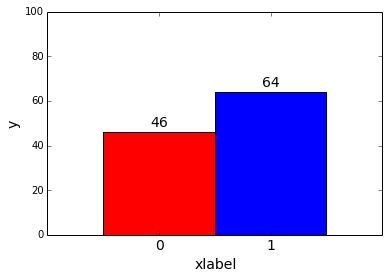

In [181]:
bar_chart((46,64),("0","1"),"xlabel","y")

In [173]:
[{u'xAxis': u'0', u'yAxis': 46.0},
 {u'xAxis': u'1', u'yAxis': 64.0},
 {u'childrenIndex': [1, 2, 3, 4, 5], u'filter': u'#', u'yName': u'COUNT(id)'}]

[{u'xAxis': u'0', u'yAxis': 46.0},
 {u'xAxis': u'1', u'yAxis': 64.0},
 {u'childrenIndex': [1, 2, 3, 4, 5], u'filter': u'#', u'yName': u'COUNT(id)'}]

In [174]:
filterName

u'sexcode=1;pc_class=1;'

In [175]:
def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=14)

In [176]:
import re

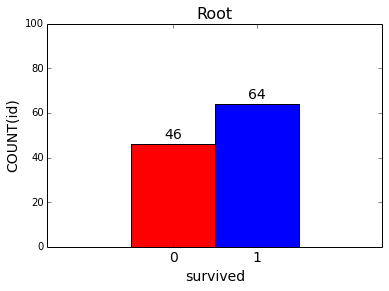

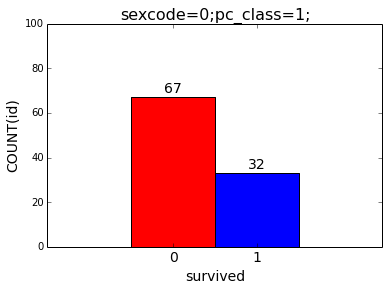

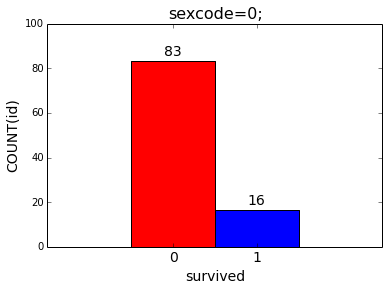

In [177]:
for node in nodeDic.values():
    xAttrs = []
    yVals =[]
    filterName=""
    for i,bar in enumerate(node): 
        if i<2:
            xAttrs.append(bar["xAxis"])
            yVals.append(bar["yAxis"])
        if i==2:
            filterName=bar['filter']
            if filterName=="#":
                filterName="Root"
            else:
                filterName=filterName.replace("0#","0;").replace("1#","1;").replace("$","=").replace("#","")
    bar_chart(yVals,xAttrs,"survived",'COUNT(id)',filterName)

In [202]:
def ax_bar_chart(ax,yVals,xAttrs,xtitle="",ytitle="",title="", N=1,width=0.1):
    ind = np.arange(N)  # the x locations for the groups
    rects1 = ax.bar(ind, yVals[0], width, color='r',  ecolor= "black")
    rects2 = ax.bar(ind + width, yVals[1], width, color='b', ecolor= "black")

    # add some text for labels, title and axes ticks
    #ax.set_ylabel(ytitle,fontsize=14)
    ax.set_title(title,fontsize=12)
    ax.set_xticks((0.05,0.15))
    ax.set_xticklabels(xAttrs,fontsize=12)
    #ax.set_xlabel(xtitle,fontsize=12)

    #ax.legend((rects1[0], rects2[0]), xAttrs)
    ax.set_xlim(-0.05,0.25)
    ax.set_ylim((0,100))

    autolabel(rects1, ax)
    autolabel(rects2, ax)

In [268]:
def generateDashboard(nodeDicStr,xlabel,ylabel,title,fname=""):    
    nodeDic=json.loads(nodeDicStr)
    fig, axs = plt.subplots(nrows=4,ncols=5,figsize=(10,8),sharex=True,sharey=True)
    axs = axs.ravel()
    for ax,node in zip(axs,nodeDic.values()):
        xAttrs = []
        yVals =[]
        filterName=""
        for i,bar in enumerate(node): 
            if i<2:
                xAttrs.append(bar["xAxis"])
                yVals.append(bar["yAxis"])
            if i==2:
                filterName=bar['filter']
                if filterName=="#":
                    filterName="Root"
                else:
                    filterName=filterName.replace("0#","0;").replace("1#","1;").replace("$","=").replace("#","")
        ax_bar_chart(ax,yVals,xAttrs,"survived",'COUNT(id)',filterName)
    fig.text(0.5, -0.01, xlabel, ha='center',fontsize=14)
    fig.text(-0.01, 0.5, ylabel, va='center', rotation='vertical',fontsize=14)
    fig.text(0.5, 1, title, ha='center',fontsize=14)
    plt.tight_layout(rect=[0.01, 0.01, 1, 1])
    if fname!="": plt.savefig(fname,bbox_inches='tight')

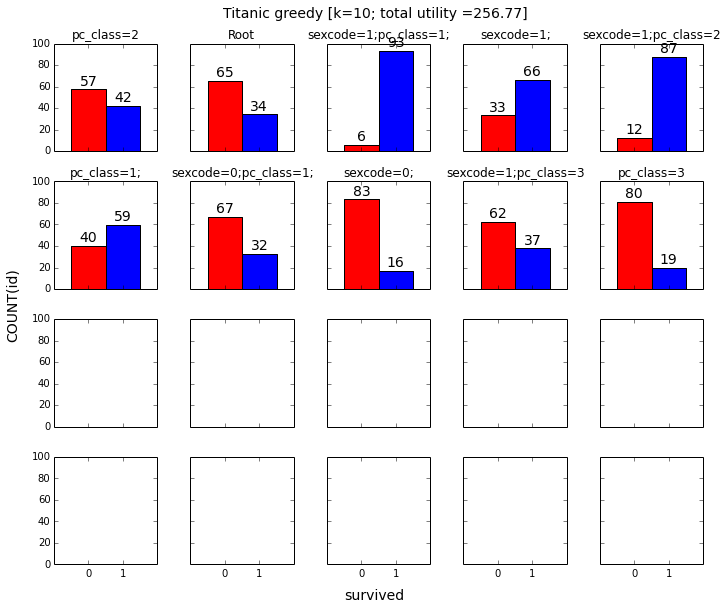

In [280]:
nodeDicStr="{\"1\": [{ \"xAxis\": \"0\", \"yAxis\":65.72734196496572},{ \"xAxis\": \"1\", \"yAxis\":34.27265803503427},{\"childrenIndex\":[1, 2, 3, 4, 5], \"filter\":\"#\",\"yName\":\"COUNT(id)\"}],\"2\": [{ \"xAxis\": \"0\", \"yAxis\":33.33333333333333},{ \"xAxis\": \"1\", \"yAxis\":66.66666666666666},{\"childrenIndex\":[9, 10], \"filter\":\"#sexcode$1#\",\"yName\":\"COUNT(id)\"}],\"3\": [{ \"xAxis\": \"0\", \"yAxis\":6.293706293706294},{ \"xAxis\": \"1\", \"yAxis\":93.7062937062937},{\"childrenIndex\":[], \"filter\":\"#sexcode$1#pc_class$1#\",\"yName\":\"COUNT(id)\"}],\"4\": [{ \"xAxis\": \"0\", \"yAxis\":40.06211180124223},{ \"xAxis\": \"1\", \"yAxis\":59.93788819875776},{\"childrenIndex\":[9], \"filter\":\"#pc_class$1#\",\"yName\":\"COUNT(id)\"}],\"5\": [{ \"xAxis\": \"0\", \"yAxis\":12.149532710280374},{ \"xAxis\": \"1\", \"yAxis\":87.85046728971963},{\"childrenIndex\":[], \"filter\":\"#sexcode$1#pc_class$2#\",\"yName\":\"COUNT(id)\"}],\"6\": [{ \"xAxis\": \"0\", \"yAxis\":83.31374853113984},{ \"xAxis\": \"1\", \"yAxis\":16.686251468860164},{\"childrenIndex\":[6, 7, 8], \"filter\":\"#sexcode$0#\",\"yName\":\"COUNT(id)\"}],\"7\": [{ \"xAxis\": \"0\", \"yAxis\":67.0391061452514},{ \"xAxis\": \"1\", \"yAxis\":32.960893854748605},{\"childrenIndex\":[], \"filter\":\"#sexcode$0#pc_class$1#\",\"yName\":\"COUNT(id)\"}],\"8\": [{ \"xAxis\": \"0\", \"yAxis\":80.59071729957806},{ \"xAxis\": \"1\", \"yAxis\":19.40928270042194},{\"childrenIndex\":[11], \"filter\":\"#pc_class$3#\",\"yName\":\"COUNT(id)\"}],\"9\": [{ \"xAxis\": \"0\", \"yAxis\":62.264150943396224},{ \"xAxis\": \"1\", \"yAxis\":37.735849056603776},{\"childrenIndex\":[], \"filter\":\"#sexcode$1#pc_class$3#\",\"yName\":\"COUNT(id)\"}],\"10\": [{ \"xAxis\": \"0\", \"yAxis\":57.49999999999999},{ \"xAxis\": \"1\", \"yAxis\":42.5},{\"childrenIndex\":[], \"filter\":\"#pc_class$2#\",\"yName\":\"COUNT(id)\"}]}"
generateDashboard(nodeDicStr,"survived","COUNT(id)","Titanic greedy [k=10; total utility =256.77]","titanic_greedy_10.pdf")

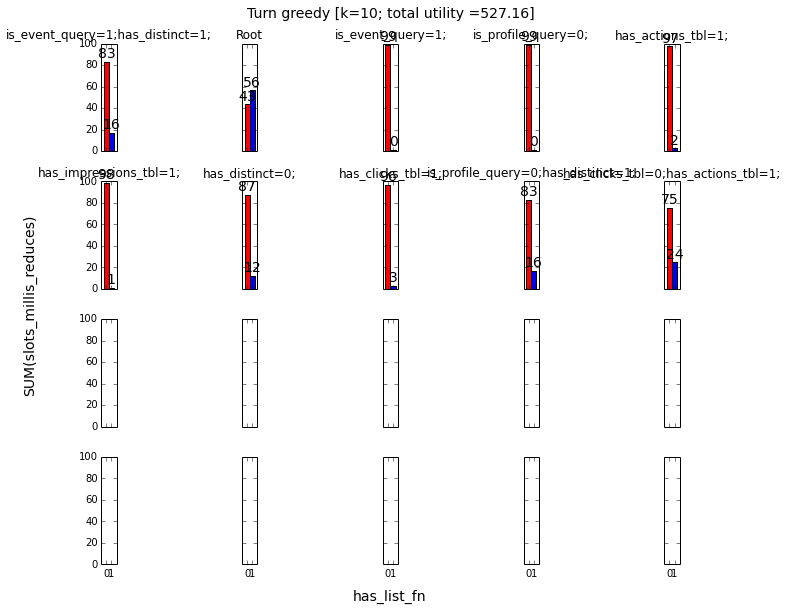

In [281]:
nodeDicStr="{\"1\": [{ \"xAxis\": \"0\", \"yAxis\":43.40789274938343},{ \"xAxis\": \"1\", \"yAxis\":56.59210725061657},{\"childrenIndex\":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], \"filter\":\"#\",\"yName\":\"COUNT(id)\"}],\"2\": [{ \"xAxis\": \"0\", \"yAxis\":99.09927735409117},{ \"xAxis\": \"1\", \"yAxis\":0.9007226459088256},{\"childrenIndex\":[15, 17, 39, 41, 42, 45, 46, 49, 50, 53, 54], \"filter\":\"#is_profile_query$0#\",\"yName\":\"COUNT(id)\"}],\"3\": [{ \"xAxis\": \"0\", \"yAxis\":99.09927735409117},{ \"xAxis\": \"1\", \"yAxis\":0.9007226459088256},{\"childrenIndex\":[20, 22, 39, 59, 60, 63, 64, 67, 68, 71, 72], \"filter\":\"#is_event_query$1#\",\"yName\":\"COUNT(id)\"}],\"4\": [{ \"xAxis\": \"0\", \"yAxis\":98.84352038584385},{ \"xAxis\": \"1\", \"yAxis\":1.156479614156162},{\"childrenIndex\":[24, 26, 75, 76, 79, 80, 83], \"filter\":\"#has_impressions_tbl$1#\",\"yName\":\"COUNT(id)\"}],\"5\": [{ \"xAxis\": \"0\", \"yAxis\":97.3967736584429},{ \"xAxis\": \"1\", \"yAxis\":2.603226341557092},{\"childrenIndex\":[32, 34, 86, 88, 95], \"filter\":\"#has_actions_tbl$1#\",\"yName\":\"COUNT(id)\"}],\"6\": [{ \"xAxis\": \"0\", \"yAxis\":96.88446968269615},{ \"xAxis\": \"1\", \"yAxis\":3.115530317303848},{\"childrenIndex\":[28, 30, 87, 91], \"filter\":\"#has_clicks_tbl$1#\",\"yName\":\"COUNT(id)\"}],\"7\": [{ \"xAxis\": \"0\", \"yAxis\":87.72514337314605},{ \"xAxis\": \"1\", \"yAxis\":12.27485662685395},{\"childrenIndex\":[35, 37, 55, 69, 81, 89, 93], \"filter\":\"#has_distinct$0#\",\"yName\":\"COUNT(id)\"}],\"8\": [{ \"xAxis\": \"0\", \"yAxis\":75.32614526552202},{ \"xAxis\": \"1\", \"yAxis\":24.673854734477988},{\"childrenIndex\":[190, 194], \"filter\":\"#has_clicks_tbl$0#has_actions_tbl$1#\",\"yName\":\"COUNT(id)\"}],\"9\": [{ \"xAxis\": \"0\", \"yAxis\":83.05518309757069},{ \"xAxis\": \"1\", \"yAxis\":16.944816902429306},{\"childrenIndex\":[226, 246, 262, 270], \"filter\":\"#is_profile_query$0#has_distinct$1#\",\"yName\":\"COUNT(id)\"}],\"10\": [{ \"xAxis\": \"0\", \"yAxis\":83.05518309757069},{ \"xAxis\": \"1\", \"yAxis\":16.944816902429306},{\"childrenIndex\":[226, 298, 314, 322], \"filter\":\"#is_event_query$1#has_distinct$1#\",\"yName\":\"COUNT(id)\"}]}"
generateDashboard(nodeDicStr,"has_list_fn","SUM(slots_millis_reduces)","Turn greedy [k=10; total utility =527.16]","turn_greedy_10.pdf")

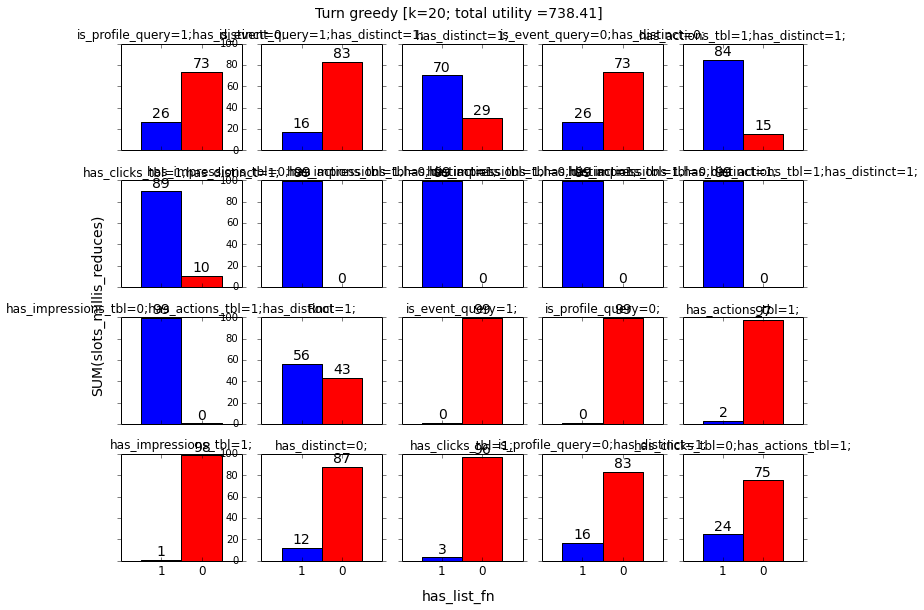

In [283]:
nodeDicStr="{\"1\": [{ \"xAxis\": \"0\", \"yAxis\":43.40789274938343},{ \"xAxis\": \"1\", \"yAxis\":56.59210725061657},{\"childrenIndex\":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], \"filter\":\"#\",\"yName\":\"COUNT(id)\"}],\"2\": [{ \"xAxis\": \"0\", \"yAxis\":99.09927735409117},{ \"xAxis\": \"1\", \"yAxis\":0.9007226459088256},{\"childrenIndex\":[15, 17, 39, 41, 42, 45, 46, 49, 50, 53, 54], \"filter\":\"#is_profile_query$0#\",\"yName\":\"COUNT(id)\"}],\"3\": [{ \"xAxis\": \"0\", \"yAxis\":99.09927735409117},{ \"xAxis\": \"1\", \"yAxis\":0.9007226459088256},{\"childrenIndex\":[20, 22, 39, 59, 60, 63, 64, 67, 68, 71, 72], \"filter\":\"#is_event_query$1#\",\"yName\":\"COUNT(id)\"}],\"4\": [{ \"xAxis\": \"0\", \"yAxis\":98.84352038584385},{ \"xAxis\": \"1\", \"yAxis\":1.156479614156162},{\"childrenIndex\":[24, 26, 75, 76, 79, 80, 83], \"filter\":\"#has_impressions_tbl$1#\",\"yName\":\"COUNT(id)\"}],\"5\": [{ \"xAxis\": \"0\", \"yAxis\":97.3967736584429},{ \"xAxis\": \"1\", \"yAxis\":2.603226341557092},{\"childrenIndex\":[32, 34, 86, 88, 95], \"filter\":\"#has_actions_tbl$1#\",\"yName\":\"COUNT(id)\"}],\"6\": [{ \"xAxis\": \"0\", \"yAxis\":96.88446968269615},{ \"xAxis\": \"1\", \"yAxis\":3.115530317303848},{\"childrenIndex\":[28, 30, 87, 91], \"filter\":\"#has_clicks_tbl$1#\",\"yName\":\"COUNT(id)\"}],\"7\": [{ \"xAxis\": \"0\", \"yAxis\":87.72514337314605},{ \"xAxis\": \"1\", \"yAxis\":12.27485662685395},{\"childrenIndex\":[35, 37, 55, 69, 81, 89, 93], \"filter\":\"#has_distinct$0#\",\"yName\":\"COUNT(id)\"}],\"8\": [{ \"xAxis\": \"0\", \"yAxis\":75.32614526552202},{ \"xAxis\": \"1\", \"yAxis\":24.673854734477988},{\"childrenIndex\":[190, 194], \"filter\":\"#has_clicks_tbl$0#has_actions_tbl$1#\",\"yName\":\"COUNT(id)\"}],\"9\": [{ \"xAxis\": \"0\", \"yAxis\":83.05518309757069},{ \"xAxis\": \"1\", \"yAxis\":16.944816902429306},{\"childrenIndex\":[226, 246, 262, 270], \"filter\":\"#is_profile_query$0#has_distinct$1#\",\"yName\":\"COUNT(id)\"}],\"10\": [{ \"xAxis\": \"0\", \"yAxis\":83.05518309757069},{ \"xAxis\": \"1\", \"yAxis\":16.944816902429306},{\"childrenIndex\":[226, 298, 314, 322], \"filter\":\"#is_event_query$1#has_distinct$1#\",\"yName\":\"COUNT(id)\"}],\"11\": [{ \"xAxis\": \"0\", \"yAxis\":73.54175531539768},{ \"xAxis\": \"1\", \"yAxis\":26.458244684602324},{\"childrenIndex\":[127, 227, 249, 265, 267, 273], \"filter\":\"#is_profile_query$1#has_distinct$0#\",\"yName\":\"COUNT(id)\"}],\"12\": [{ \"xAxis\": \"0\", \"yAxis\":73.54175531539768},{ \"xAxis\": \"1\", \"yAxis\":26.458244684602324},{\"childrenIndex\":[157, 227, 293, 309, 311, 317], \"filter\":\"#is_event_query$0#has_distinct$0#\",\"yName\":\"COUNT(id)\"}],\"13\": [{ \"xAxis\": \"0\", \"yAxis\":29.77955596154781},{ \"xAxis\": \"1\", \"yAxis\":70.22044403845219},{\"childrenIndex\":[36, 38, 56, 70, 82, 84, 90, 92, 94, 96], \"filter\":\"#has_distinct$1#\",\"yName\":\"COUNT(id)\"}],\"14\": [{ \"xAxis\": \"0\", \"yAxis\":10.245557411390175},{ \"xAxis\": \"1\", \"yAxis\":89.75444258860983},{\"childrenIndex\":[200, 354], \"filter\":\"#has_clicks_tbl$1#has_distinct$1#\",\"yName\":\"COUNT(id)\"}],\"15\": [{ \"xAxis\": \"0\", \"yAxis\":15.164093658579409},{ \"xAxis\": \"1\", \"yAxis\":84.8359063414206},{\"childrenIndex\":[208, 344, 352, 356], \"filter\":\"#has_actions_tbl$1#has_distinct$1#\",\"yName\":\"COUNT(id)\"}],\"16\": [{ \"xAxis\": \"0\", \"yAxis\":0.5184888475114967},{ \"xAxis\": \"1\", \"yAxis\":99.4815111524885},{\"childrenIndex\":[614, 622, 818, 822], \"filter\":\"#has_impressions_tbl$0#has_actions_tbl$1#has_distinct$1#\",\"yName\":\"COUNT(id)\"}],\"17\": [{ \"xAxis\": \"0\", \"yAxis\":0.5184888475114967},{ \"xAxis\": \"1\", \"yAxis\":99.4815111524885},{\"childrenIndex\":[614, 622, 818, 822], \"filter\":\"#has_impressions_tbl$0#has_actions_tbl$1#has_distinct$1#\",\"yName\":\"COUNT(id)\"}],\"18\": [{ \"xAxis\": \"0\", \"yAxis\":0.5184888475114967},{ \"xAxis\": \"1\", \"yAxis\":99.4815111524885},{\"childrenIndex\":[614, 622, 818, 822], \"filter\":\"#has_impressions_tbl$0#has_actions_tbl$1#has_distinct$1#\",\"yName\":\"COUNT(id)\"}],\"19\": [{ \"xAxis\": \"0\", \"yAxis\":0.5184888475114967},{ \"xAxis\": \"1\", \"yAxis\":99.4815111524885},{\"childrenIndex\":[614, 622, 818, 822], \"filter\":\"#has_impressions_tbl$0#has_actions_tbl$1#has_distinct$1#\",\"yName\":\"COUNT(id)\"}],\"20\": [{ \"xAxis\": \"0\", \"yAxis\":0.5184888475114967},{ \"xAxis\": \"1\", \"yAxis\":99.4815111524885},{\"childrenIndex\":[614, 622, 818, 822], \"filter\":\"#has_impressions_tbl$0#has_actions_tbl$1#has_distinct$1#\",\"yName\":\"COUNT(id)\"}]}"
generateDashboard(nodeDicStr,"has_list_fn","SUM(slots_millis_reduces)","Turn greedy [k=20; total utility =738.41]","turn_greedy_20.pdf")

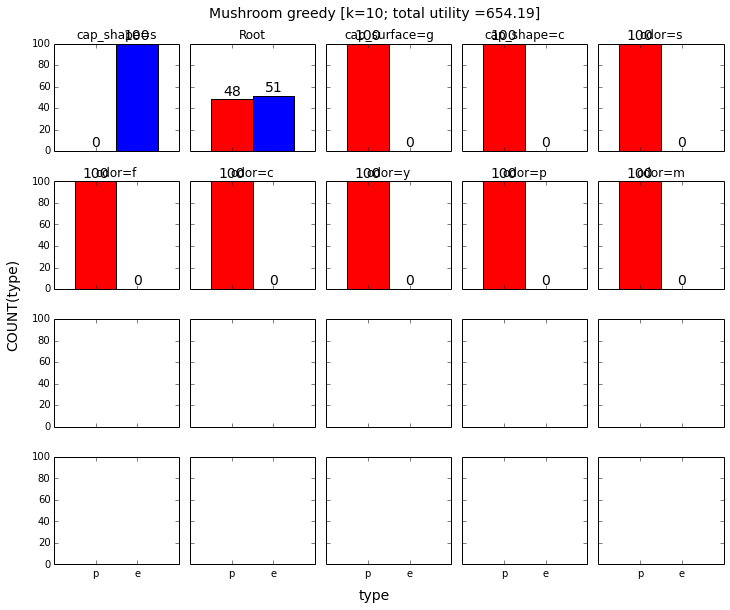

In [285]:
nodeDicStr="{\"1\": [{ \"xAxis\": \"p\", \"yAxis\":48.20285573609059},{ \"xAxis\": \"e\", \"yAxis\":51.7971442639094},{\"childrenIndex\":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], \"filter\":\"#\",\"yName\":\"COUNT(id)\"}],\"2\": [{ \"xAxis\": \"p\", \"yAxis\":100.0},{ \"xAxis\": \"e\", \"yAxis\":0.0},{\"childrenIndex\":[39, 40, 66, 67, 92, 93, 111], \"filter\":\"#cap_shape$c#\",\"yName\":\"COUNT(id)\"}],\"3\": [{ \"xAxis\": \"p\", \"yAxis\":100.0},{ \"xAxis\": \"e\", \"yAxis\":0.0},{\"childrenIndex\":[35, 40, 44, 49, 151, 158, 180], \"filter\":\"#cap_surface$g#\",\"yName\":\"COUNT(id)\"}],\"4\": [{ \"xAxis\": \"p\", \"yAxis\":100.0},{ \"xAxis\": \"e\", \"yAxis\":0.0},{\"childrenIndex\":[104, 113, 120, 161, 169, 177, 200, 205, 208, 214, 221, 226, 234, 238], \"filter\":\"#odor$f#\",\"yName\":\"COUNT(id)\"}],\"5\": [{ \"xAxis\": \"p\", \"yAxis\":100.0},{ \"xAxis\": \"e\", \"yAxis\":0.0},{\"childrenIndex\":[105, 114, 121, 162, 170, 209, 215, 239], \"filter\":\"#odor$s#\",\"yName\":\"COUNT(id)\"}],\"6\": [{ \"xAxis\": \"p\", \"yAxis\":100.0},{ \"xAxis\": \"e\", \"yAxis\":0.0},{\"childrenIndex\":[106, 115, 122, 163, 171, 210, 216, 240], \"filter\":\"#odor$y#\",\"yName\":\"COUNT(id)\"}],\"7\": [{ \"xAxis\": \"p\", \"yAxis\":100.0},{ \"xAxis\": \"e\", \"yAxis\":0.0},{\"childrenIndex\":[107, 172, 178, 201, 222, 231, 241], \"filter\":\"#odor$c#\",\"yName\":\"COUNT(id)\"}],\"8\": [{ \"xAxis\": \"p\", \"yAxis\":100.0},{ \"xAxis\": \"e\", \"yAxis\":0.0},{\"childrenIndex\":[108, 116, 123, 164, 211, 217, 229, 242], \"filter\":\"#odor$m#\",\"yName\":\"COUNT(id)\"}],\"9\": [{ \"xAxis\": \"p\", \"yAxis\":100.0},{ \"xAxis\": \"e\", \"yAxis\":0.0},{\"childrenIndex\":[110, 125, 166, 174, 203, 219, 236], \"filter\":\"#odor$p#\",\"yName\":\"COUNT(id)\"}],\"10\": [{ \"xAxis\": \"p\", \"yAxis\":0.0},{ \"xAxis\": \"e\", \"yAxis\":100.0},{\"childrenIndex\":[45, 76, 77, 96, 117], \"filter\":\"#cap_shape$s#\",\"yName\":\"COUNT(id)\"}]}"
generateDashboard(nodeDicStr,"type","COUNT(type)","Mushroom greedy [k=10; total utility =654.19]","mushroom_greedy_10.pdf")

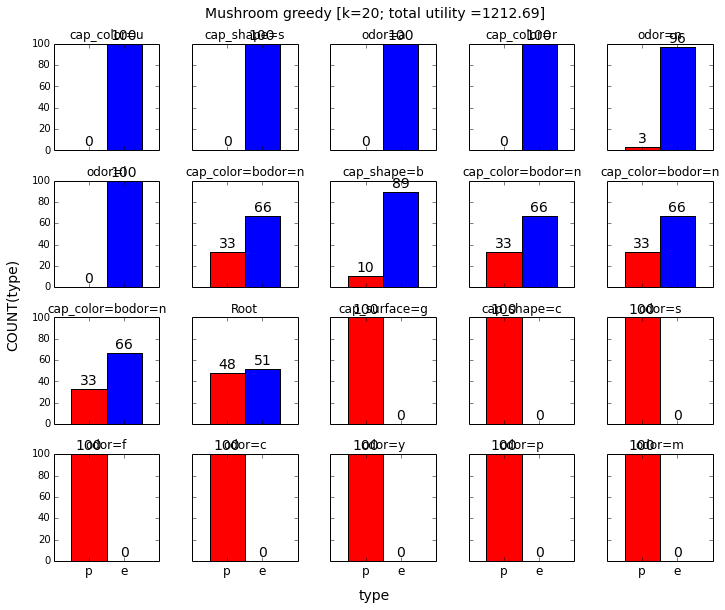

In [284]:
nodeDicStr="{\"1\": [{ \"xAxis\": \"p\", \"yAxis\":48.20285573609059},{ \"xAxis\": \"e\", \"yAxis\":51.7971442639094},{\"childrenIndex\":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], \"filter\":\"#\",\"yName\":\"COUNT(id)\"}],\"2\": [{ \"xAxis\": \"p\", \"yAxis\":100.0},{ \"xAxis\": \"e\", \"yAxis\":0.0},{\"childrenIndex\":[39, 40, 66, 67, 92, 93, 111], \"filter\":\"#cap_shape$c#\",\"yName\":\"COUNT(id)\"}],\"3\": [{ \"xAxis\": \"p\", \"yAxis\":100.0},{ \"xAxis\": \"e\", \"yAxis\":0.0},{\"childrenIndex\":[35, 40, 44, 49, 151, 158, 180], \"filter\":\"#cap_surface$g#\",\"yName\":\"COUNT(id)\"}],\"4\": [{ \"xAxis\": \"p\", \"yAxis\":100.0},{ \"xAxis\": \"e\", \"yAxis\":0.0},{\"childrenIndex\":[104, 113, 120, 161, 169, 177, 200, 205, 208, 214, 221, 226, 234, 238], \"filter\":\"#odor$f#\",\"yName\":\"COUNT(id)\"}],\"5\": [{ \"xAxis\": \"p\", \"yAxis\":100.0},{ \"xAxis\": \"e\", \"yAxis\":0.0},{\"childrenIndex\":[105, 114, 121, 162, 170, 209, 215, 239], \"filter\":\"#odor$s#\",\"yName\":\"COUNT(id)\"}],\"6\": [{ \"xAxis\": \"p\", \"yAxis\":100.0},{ \"xAxis\": \"e\", \"yAxis\":0.0},{\"childrenIndex\":[106, 115, 122, 163, 171, 210, 216, 240], \"filter\":\"#odor$y#\",\"yName\":\"COUNT(id)\"}],\"7\": [{ \"xAxis\": \"p\", \"yAxis\":100.0},{ \"xAxis\": \"e\", \"yAxis\":0.0},{\"childrenIndex\":[107, 172, 178, 201, 222, 231, 241], \"filter\":\"#odor$c#\",\"yName\":\"COUNT(id)\"}],\"8\": [{ \"xAxis\": \"p\", \"yAxis\":100.0},{ \"xAxis\": \"e\", \"yAxis\":0.0},{\"childrenIndex\":[108, 116, 123, 164, 211, 217, 229, 242], \"filter\":\"#odor$m#\",\"yName\":\"COUNT(id)\"}],\"9\": [{ \"xAxis\": \"p\", \"yAxis\":100.0},{ \"xAxis\": \"e\", \"yAxis\":0.0},{\"childrenIndex\":[110, 125, 166, 174, 203, 219, 236], \"filter\":\"#odor$p#\",\"yName\":\"COUNT(id)\"}],\"10\": [{ \"xAxis\": \"p\", \"yAxis\":0.0},{ \"xAxis\": \"e\", \"yAxis\":100.0},{\"childrenIndex\":[45, 76, 77, 96, 117], \"filter\":\"#cap_shape$s#\",\"yName\":\"COUNT(id)\"}],\"11\": [{ \"xAxis\": \"p\", \"yAxis\":0.0},{ \"xAxis\": \"e\", \"yAxis\":100.0},{\"childrenIndex\":[58, 80, 128, 184, 206], \"filter\":\"#cap_color$u#\",\"yName\":\"COUNT(id)\"}],\"12\": [{ \"xAxis\": \"p\", \"yAxis\":0.0},{ \"xAxis\": \"e\", \"yAxis\":100.0},{\"childrenIndex\":[62, 84, 132, 191, 223], \"filter\":\"#cap_color$r#\",\"yName\":\"COUNT(id)\"}],\"13\": [{ \"xAxis\": \"p\", \"yAxis\":0.0},{ \"xAxis\": \"e\", \"yAxis\":100.0},{\"childrenIndex\":[99, 102, 118, 159, 167, 175, 198, 212, 224, 232], \"filter\":\"#odor$a#\",\"yName\":\"COUNT(id)\"}],\"14\": [{ \"xAxis\": \"p\", \"yAxis\":0.0},{ \"xAxis\": \"e\", \"yAxis\":100.0},{\"childrenIndex\":[101, 109, 124, 165, 173, 179, 202, 218, 227, 235], \"filter\":\"#odor$l#\",\"yName\":\"COUNT(id)\"}],\"15\": [{ \"xAxis\": \"p\", \"yAxis\":3.4013605442176873},{ \"xAxis\": \"e\", \"yAxis\":96.5986394557823},{\"childrenIndex\":[103, 112, 119, 160, 168, 176, 199, 204, 207, 213, 220, 228, 230, 233, 237], \"filter\":\"#odor$n#\",\"yName\":\"COUNT(id)\"}],\"16\": [{ \"xAxis\": \"p\", \"yAxis\":10.619469026548673},{ \"xAxis\": \"e\", \"yAxis\":89.38053097345133},{\"childrenIndex\":[32, 33, 34, 50, 52, 53, 54, 88, 89, 100], \"filter\":\"#cap_shape$b#\",\"yName\":\"COUNT(id)\"}],\"17\": [{ \"xAxis\": \"p\", \"yAxis\":33.33333333333333},{ \"xAxis\": \"e\", \"yAxis\":66.66666666666666},{\"childrenIndex\":[551, 656, 687, 755], \"filter\":\"#cap_color$b#odor$n#\",\"yName\":\"COUNT(id)\"}],\"18\": [{ \"xAxis\": \"p\", \"yAxis\":33.33333333333333},{ \"xAxis\": \"e\", \"yAxis\":66.66666666666666},{\"childrenIndex\":[551, 656, 687, 755], \"filter\":\"#cap_color$b#odor$n#\",\"yName\":\"COUNT(id)\"}],\"19\": [{ \"xAxis\": \"p\", \"yAxis\":33.33333333333333},{ \"xAxis\": \"e\", \"yAxis\":66.66666666666666},{\"childrenIndex\":[551, 656, 687, 755], \"filter\":\"#cap_color$b#odor$n#\",\"yName\":\"COUNT(id)\"}],\"20\": [{ \"xAxis\": \"p\", \"yAxis\":33.33333333333333},{ \"xAxis\": \"e\", \"yAxis\":66.66666666666666},{\"childrenIndex\":[551, 656, 687, 755], \"filter\":\"#cap_color$b#odor$n#\",\"yName\":\"COUNT(id)\"}]}"
generateDashboard(nodeDicStr,"type","COUNT(type)","Mushroom greedy [k=20; total utility =1212.69]","mushroom_greedy_20.pdf")

# To do

- generalized k-bar bar chart visualization
- inside generateDashboard, order the vis by Root first then first level then second
- fix formatting issues with the turn dataset and fix title and labels